In [37]:
import pandas as pd


df = pd.read_csv(r'D:\python for data sinceand ml\project-nlp-log-classification\training\dateset\synthetic_logs.csv')

In [38]:
df.describe()

,timestamp,source,log_message,target_label
count,2410,2410,2410,2410
unique,2402,6,2265,9
top,4/28/2025 20:42,ThirdPartyAPI,Backup completed successfully.,HTTP Status
freq,2,496,60,1017


In [39]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [40]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [41]:
from sentence_transformers import SentenceTransformer # type: ignore
from sklearn.cluster import DBSCAN
import numpy as np 

In [58]:
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['log_message'].tolist())

dbscan = DBSCAN(eps=0.24,min_samples=5,metric='cosine')

clusters = dbscan.fit_predict(embeddings)



In [59]:
df['cluster'] = clusters

In [60]:
df

,timestamp,source,log_message,target_label,cluster
0,6/27/2025 7:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,29
3,7/12/2025 0:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0
4,6/2/2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0
...,...,...,...,...,...
2405,8/13/2025 7:29,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,0
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,6
2407,8/3/2025 3:07,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,0
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,1


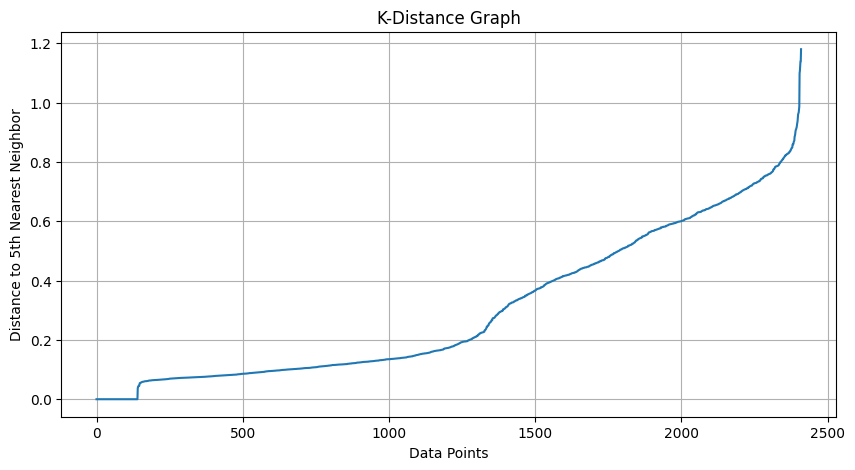

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# لو عندك بالفعل embeddings (مثلاً جاي من sentence-transformers)
# embeddings = model.encode(df['log_message']).tolist()

# نحدد عدد الجيران (عادة min_samples - 1)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(embeddings)
distances, indices = neighbors_fit.kneighbors(embeddings)

# نرتب المسافات من الأكبر للأصغر
distances = np.sort(distances[:, 4])  # العمود الأخير هو أكبر مسافة بين الـ 5 جيران

# نرسم k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Data Points")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.grid(True)
plt.show()


In [68]:
cluster_count = df.cluster.value_counts()
large_cluster = cluster_count[cluster_count >10].index

for cluster in large_cluster:
  print(f'cluster {cluster}.')
  print(df[df['cluster']==cluster]['log_message'].head(30).to_string(index = False))
  

cluster 0.
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...
nova.osapi_compute.wsgi.server [req-d4f8d0c2-4f...
nova.osapi_compute.wsgi.server [req-6fe0e366-f2...
nova.osapi_compute.wsgi.server [req-5f1c2027-e1...
nova.osapi_compute.wsgi.server [req-945d1f31-a2...
nova.osapi_compute.wsgi.server [req-033d97b9-69...
nova.osapi_compute.wsgi.server [req-75bc6269-85...
nova.osapi_compute.wsgi.server [req-077c3c87-b7...
nova.osapi_compute.wsgi.server [req-4e83daf7-a2...
nova.osapi_compute.wsgi.server [req-bfce366e-98...
nova.osapi_compute.wsgi.server [req-5e6e042b-f9...
nova.metadata.wsgi.server [-] 10.11.21.138,10.1...
nova.osapi_compute.wsgi.server [req-fe9ef402-d3...
nova.metadata.wsgi.server [req-27e91939-3ba4-4d...
nova.osapi_compute.wsgi.server [req-aef59c8e-1f...
nova.osapi_compute.w